## Assignment - 1
### Name : Limalka Sadith
### Index No : 190538N

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

256


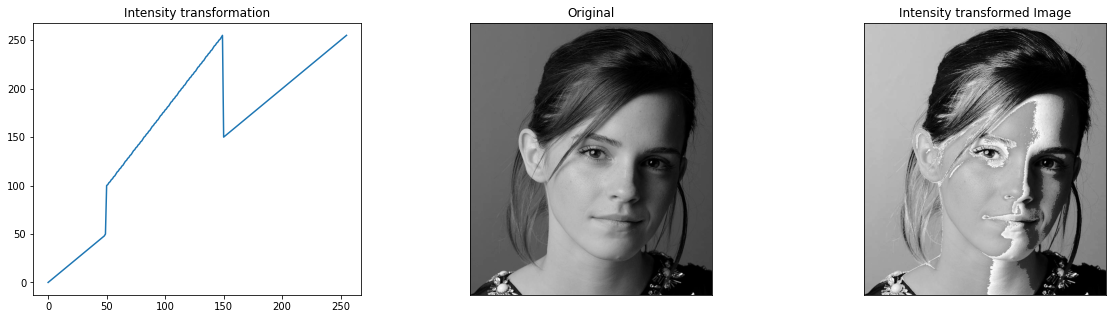

In [205]:
#Q1
t1 = np.linspace(0,50,50)
t2 = np.linspace(100,255,100)
t3 = np.linspace(150,255,106)

t = np.concatenate((t1,t2,t3),axis = 0).astype(np.uint8)
print(len(t))

img = cv.imread('emma_gray.jpg',cv.IMREAD_GRAYSCALE)
assert img is not None, "Image Not Found!!"

new_img = cv.LUT(img,t)

fig,ax = plt.subplots(1,3,figsize = [20,5])
ax[0].plot(t)
ax[1].imshow(img,cmap='gray',vmin=0,vmax=255)
ax[1].axes.xaxis.set_visible(False)
ax[1].axes.yaxis.set_visible(False)
ax[0].set_title('Intensity transformation')
ax[1].set_title('Original')
ax[2].set_title('Intensity transformed Image')
ax[2].imshow(new_img,cmap='gray',vmin=0,vmax=255)
ax[2].axes.xaxis.set_visible(False)
ax[2].axes.yaxis.set_visible(False)
plt.show()

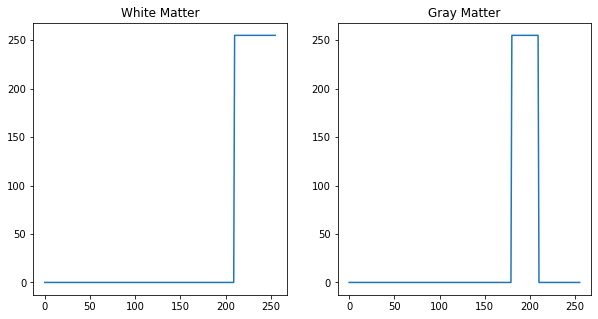

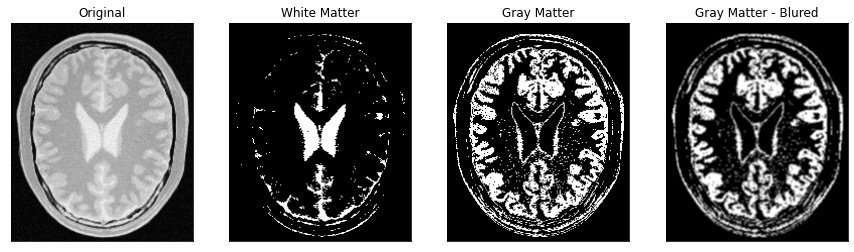

In [29]:
#Q2
x = 210
t1 = np.linspace(0,0,x)
t2 = np.linspace(255,255,256-x)

y = 180
y_size = 30
t3 = np.linspace(0,0,y)
t4 = np.linspace(255,255,y_size)
t5 = np.linspace(0,0,256-y_size-y)


t_white = np.concatenate((t1,t2),axis = 0).astype(np.uint8)
t_gray = np.concatenate((t3,t4,t5),axis = 0).astype(np.uint8)
assert len(t_white)== 256, "Transformation Incorrect"
assert len(t_gray)== 256, "Transformation Incorrect"


img = cv.imread('brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE).astype(np.uint8)
assert img is not None, "Image Not Found!!"

white_matter = cv.LUT(img,t_white)
gray_matter = cv.LUT(img,t_gray)
gray_matter_filtered = cv.GaussianBlur(gray_matter,(3,3),0)
# gray_matter_filtered = cv.medianBlur(gray_matter,3)


fig,ax = plt.subplots(1,2,figsize = [10,5])
ax[0].plot(t_white)
ax[1].plot(t_gray)

ax[0].set_title('White Matter')
ax[1].set_title('Gray Matter')

fig,ax = plt.subplots(1,4,figsize = [15,5])

ax[0].imshow(img,cmap='gray',vmin=0,vmax=255)
ax[0].axes.xaxis.set_visible(False)
ax[0].axes.yaxis.set_visible(False)

ax[1].imshow(white_matter,cmap='gray',vmin=0,vmax=255)
ax[1].axes.xaxis.set_visible(False)
ax[1].axes.yaxis.set_visible(False)

ax[2].imshow(gray_matter,cmap='gray',vmin=0,vmax=255)
ax[2].axes.xaxis.set_visible(False)
ax[2].axes.yaxis.set_visible(False)

ax[3].imshow(gray_matter_filtered,cmap='gray',vmin=0,vmax=255)
ax[3].axes.xaxis.set_visible(False)
ax[3].axes.yaxis.set_visible(False)

ax[0].set_title('Original')
ax[1].set_title('White Matter')
ax[2].set_title('Gray Matter')
ax[3].set_title('Gray Matter - Blured')
plt.show()

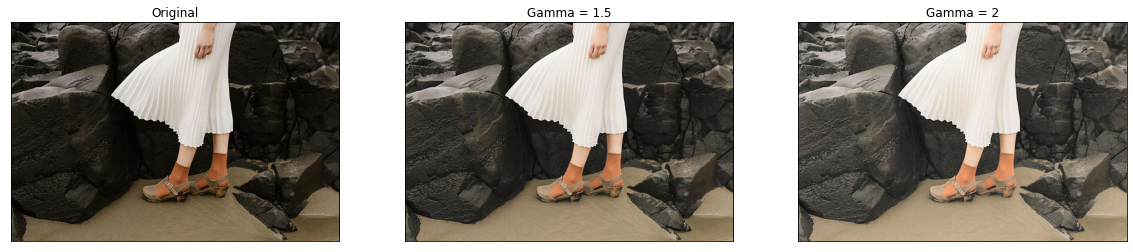

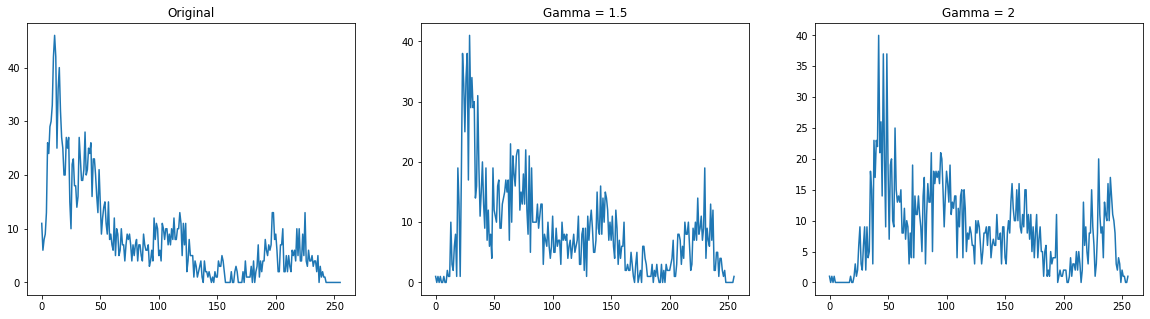

In [18]:
#Q3
def gammaCorrection(img,gamma): #gamma correction only to the L plane
    temp_img = img.copy()
    invGamma = 1/gamma
    for i in range (len(img)):
        for j in range (len(img[0])):
            temp_img[i][j][0] = ((img[i][j][0] / 255) ** invGamma) * 255
    return temp_img

img = cv.imread('highlights_and_shadows.jpg').astype(np.uint8)
assert img is not None, "Image Not Found!!"

gamma_1 = 1.5
gamma_2 = 2

img_RGB = cv.cvtColor(img,cv.COLOR_BGR2RGB)
img_Lab = cv.cvtColor(img,cv.COLOR_BGR2Lab)

img_corrected_1 = gammaCorrection(img_Lab,gamma_1)
img_corrected_2 = gammaCorrection(img_Lab,gamma_2)

img_corrected_RGB_1 = cv.cvtColor(img_corrected_1,cv.COLOR_LAB2RGB)
img_corrected_RGB_2 = cv.cvtColor(img_corrected_2,cv.COLOR_LAB2RGB)

fig,ax = plt.subplots(1,3,figsize = [20,8])

ax[0].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
ax[0].axes.xaxis.set_visible(False)
ax[0].axes.yaxis.set_visible(False)


ax[1].imshow(img_corrected_RGB_1)
ax[1].axes.xaxis.set_visible(False)
ax[1].axes.yaxis.set_visible(False)

ax[2].imshow(img_corrected_RGB_2)
ax[2].axes.xaxis.set_visible(False)
ax[2].axes.yaxis.set_visible(False)

ax[0].set_title('Original')
ax[1].set_title('Gamma = {}'.format(gamma_1))
ax[2].set_title('Gamma = {}'.format(gamma_2))
plt.show()

hist_original = cv.calcHist(cv.cvtColor(img_RGB,cv.COLOR_BGR2RGB),[0],None,[256],[0,256])
hist_corrected_1 = cv.calcHist(img_corrected_RGB_1,[0],None,[256],[0,256])
hist_corrected_2 = cv.calcHist(img_corrected_RGB_2,[0],None,[256],[0,256])

fig,ax = plt.subplots(1,3,figsize = [20,5])

ax[0].plot(hist_original)
ax[1].plot(hist_corrected_1)
ax[2].plot(hist_corrected_2)

ax[0].set_title('Original')
ax[1].set_title('Gamma = {}'.format(gamma_1))
ax[2].set_title('Gamma = {}'.format(gamma_2))

# plt.legend(loc=1, prop={'size': 10})
plt.show()

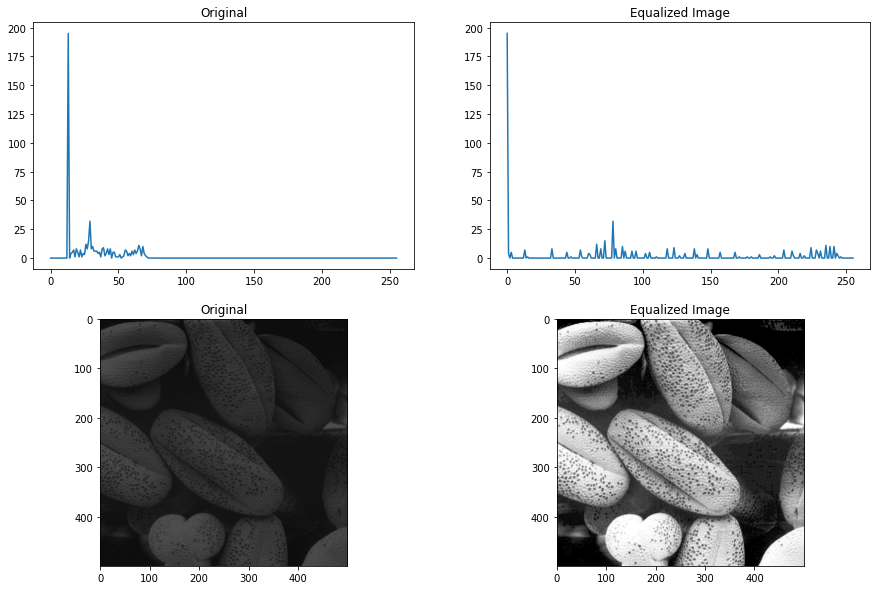

In [28]:
#Q4
img = cv.imread('shells.png',cv.IMREAD_GRAYSCALE).astype(np.uint8)
assert img is not None, "Image Not Found!!"

eq_img = cv.equalizeHist(img)

hist_original = cv.calcHist(img,[0],None,[256],[0,256])
hist_corrected_1 = cv.calcHist(eq_img,[0],None,[256],[0,256])
# hist_corrected_2 = cv.calcHist(img_corrected_RGB_2,[0],None,[256],[0,256])

fig,ax = plt.subplots(2,2,figsize = [15,10])

ax[0][0].plot(hist_original)
ax[0][1].plot(hist_corrected_1)
ax[1][0].imshow(img,cmap = 'gray',vmin =0,vmax =255)
ax[1][1].imshow(eq_img,cmap = 'gray',vmin =0,vmax =255)

ax[0][0].set_title('Original')
ax[0][1].set_title('Equalized Image')
ax[1][0].set_title('Original')
ax[1][1].set_title('Equalized Image')

plt.show()

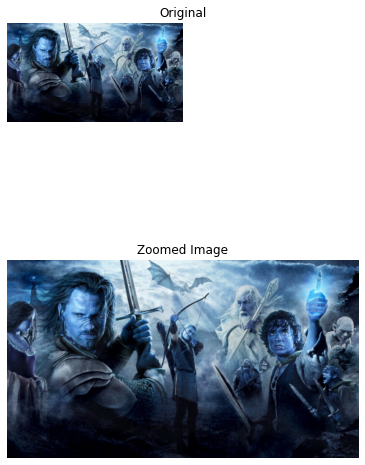

In [43]:
#Q5
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

def convertIndex(i,j,scale):
    x = int(i/scale)
    y = int(j/scale)
    return x,y

def zoomImg(img,scale):
    rows = int(img.shape[0]*scale)
    columns = int(img.shape[1]*scale)

    new_img = np.zeros((rows,columns,3),img.dtype)

    for i in range(rows):
        for j in range(columns):
            x,y = convertIndex(i,j,scale)
            new_img[i][j] = img[x][y]
    
    return new_img


img = cv.imread('a1q5images/im01small.png')
assert img is not None, "Image Not Found!!"

zoomed_img = zoomImg(img,2)

fig,ax = plt.subplots(2,1,figsize =[15,8],sharey=True,sharex =True)

ax[0].imshow(img)
ax[1].imshow(zoomed_img)
ax[0].axis('off')
ax[1].axis('off')

ax[0].set_title('Original')
ax[1].set_title('Zoomed Image')

plt.show()